In [15]:
pip install langchain_groq langgraph langgraph-cli[inmem] langchain_openai

In [16]:
from openai import OpenAI
from google.colab import userdata
api_key = userdata.get('GROQ_API_KEY')

In [17]:
from langchain_groq import ChatGroq
client = OpenAI(api_key=api_key)
llm=ChatGroq(model="qwen-2.5-32b", api_key=api_key)

In [18]:
from typing_extensions import TypedDict
class State(TypedDict):
  title:str
  context:str

In [19]:
def Title_Creator(state: State) -> State:
  """
Title_Creator function prompts the user to enter a title if the 'title' key
is not already present in the given state dictionary. It then updates and
returns the modified state.

Parameters:
    state (State): A dictionary representing the current state.

Returns:
    State: The updated state dictionary with a 'title' key.
"""

  if not state.get('title'):
    state['title'] = input("Enter a title: ")
  return state

In [27]:
def Content_Writer(state: State) -> State:
  """
Content_Writer function generates detailed content based on the 'title' key
in the given state dictionary using the ChatGroq model. It includes debugging
to inspect the response structure and ensures the extracted content is stored
in the 'content' key of the state.

Parameters:
    state (State): A dictionary containing the 'title' key.

Returns:
    State: The updated state dictionary with a 'content' key containing
    the generated article.
"""

  # Use the ChatGroq model to generate content based on the title
  prompt = f"Write a detailed article about: {state['title']}"
  response = llm.invoke(prompt)

  # Debugging: Print the response to inspect its structure
  print("Response from ChatGroq:", response)

  # Extract the content from the response
  # Assuming the response is a string or has a 'content' attribute
  if isinstance(response, str):
    state['content'] = response
  elif hasattr(response, 'content'):
    state['content'] = response.content
  else:
    state['content'] = str(response)  # Fallback: Convert the response to a string

  return state

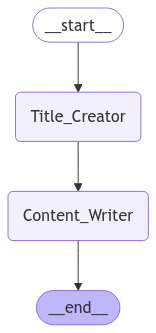

In [28]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("Title_Creator", Title_Creator)
builder.add_node("Content_Writer", Content_Writer)

builder.add_edge(START, "Title_Creator")
builder.add_edge("Title_Creator", "Content_Writer")
builder.add_edge("Content_Writer", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
# Run the graph with an initial state
initial_state: State = {'title': '', 'content': ''}
final_state = graph.invoke(initial_state)

Enter a title: coffee date
Response from ChatGroq: content='### The Coffee Date: An Art of Connection\n\nThe coffee date, a modern take on the traditional meeting, has become a cornerstone of the dating world. It provides a casual yet purposeful setting where two people can get to know one another without the pressure of a formal dinner or the awkwardness of a first-time hangout. This article explores the intricacies of the coffee date, from the selection of the perfect café to the conversation starters and tips for making the most of this initial encounter.\n\n#### Choosing the Right Café\n\nSelecting the right café is crucial to setting the right tone for the date. Here are a few considerations to make:\n\n1. **Ambiance and Atmosphere**: Look for a café that is neither too loud nor too quiet. Ideally, the café should have a cozy yet open atmosphere that encourages conversation. Natural lighting and comfortable seating can also enhance the mood.\n\n2. **Location**: Choose a café in a 